Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
🔍 Missing values:
 HTH Goals     924
HTA Goals     924
HT Result     924
H Shots      2824
A Shots      2824
H SOT        2824
A SOT        2824
H Fouls      2824
A Fouls      2824
H Corners    2824
A Corners    2824
H Yellow     2824
A Yellow     2824
H Red        2824
A Red        2824
dtype: int64


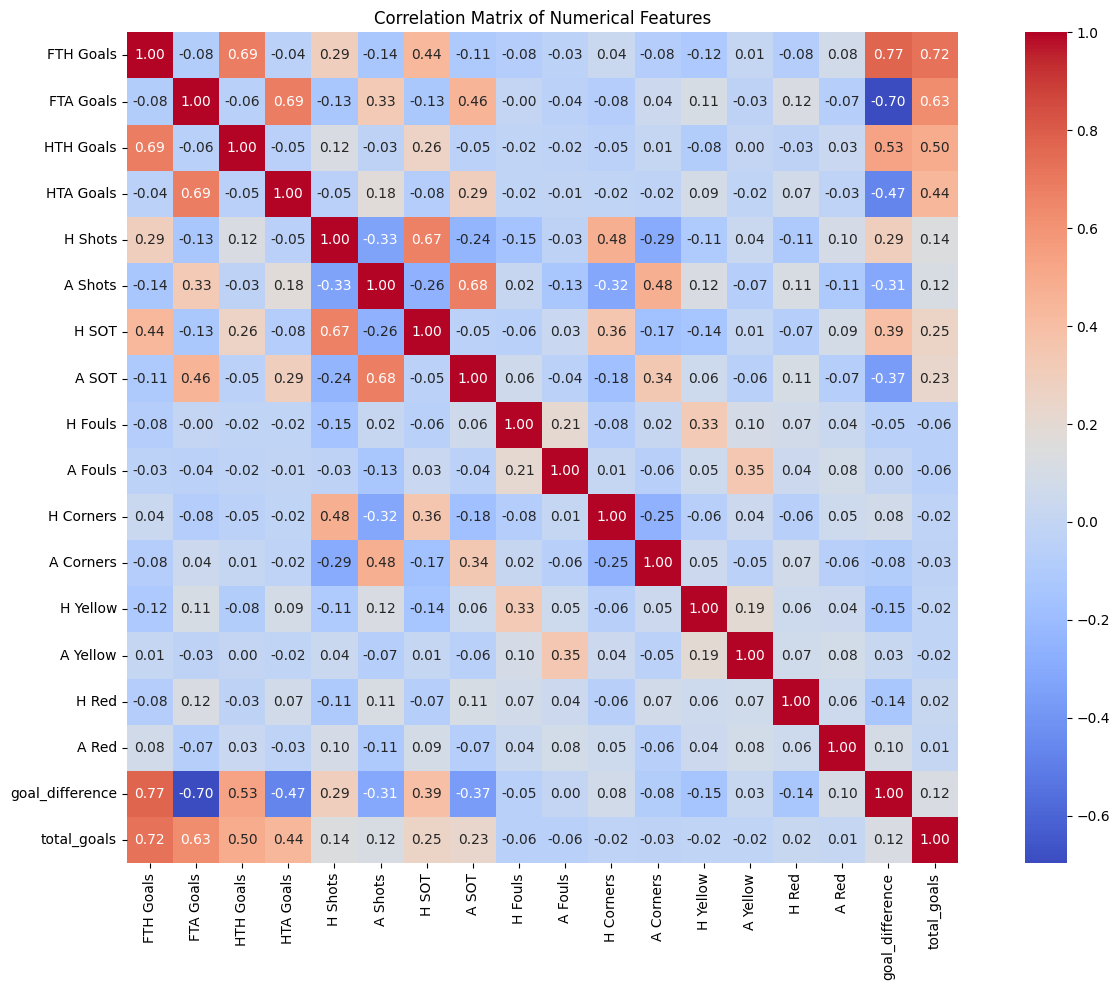


📌 Highly correlated feature pairs (|corr| > 0.85):

✅ Cleaned and reduced dataset shape: (9329, 25)
        Date   Season      HomeTeam                AwayTeam  FTH Goals  \
0 2025-01-16  2024/25  ipswich town  brighton & hove albion          0   
1 2025-01-16  2024/25    man united             southampton          3   
2 2025-01-15  2024/25       everton             aston villa          0   
3 2025-01-15  2024/25     leicester          crystal palace          0   
4 2025-01-15  2024/25     newcastle                  wolves          3   

   FTA Goals FT Result  HTH Goals  HTA Goals HT Result  ...  A Fouls  \
0          2         A        0.0        1.0         A  ...     14.0   
1          1         H        0.0        1.0         A  ...     10.0   
2          1         A        0.0        0.0         D  ...     10.0   
3          2         A        0.0        0.0         D  ...      6.0   
4          0         H        1.0        0.0         H  ...     13.0   

   H Corners  A Corne

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

# Step 1: Load the dataset
file_path = "/content/drive/MyDrive/PL Project/England CSV.csv"
df = pd.read_csv(file_path)


# Step 2: Filter for Premier League only
df_prem = df[df["League"] == "Premier League"].copy()

# Step 3: Convert 'Date' to datetime format
df_prem["Date"] = pd.to_datetime(df_prem["Date"], dayfirst=True, errors='coerce')

# Step 4: Standardize team names
df_prem["HomeTeam"] = df_prem["HomeTeam"].str.strip().str.lower()
df_prem["AwayTeam"] = df_prem["AwayTeam"].str.strip().str.lower()

# Step 5: Drop unnecessary columns
df_prem.drop(columns=["Referee", "Display_Order"], inplace=True)

# Step 6: Feature Engineering
df_prem["goal_difference"] = df_prem["FTH Goals"] - df_prem["FTA Goals"]
df_prem["total_goals"] = df_prem["FTH Goals"] + df_prem["FTA Goals"]

# Step 7: Check for missing values
print("🔍 Missing values:\n", df_prem.isnull().sum()[df_prem.isnull().any()])
df_prem.dropna(inplace=True)


# Step 8: Correlation Matrix (numeric features only)
numeric_df = df_prem.select_dtypes(include=["float64", "int64"])

plt.figure(figsize=(14, 10))
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.show()

# Step 9: Identify highly correlated pairs (> 0.85 or < -0.85)
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.85:
            col1 = corr_matrix.columns[i]
            col2 = corr_matrix.columns[j]
            corr_value = corr_matrix.iloc[i, j]
            high_corr_pairs.append((col1, col2, corr_value))

print("\n📌 Highly correlated feature pairs (|corr| > 0.85):")
for col1, col2, corr in high_corr_pairs:
    print(f"{col1} ↔ {col2} → correlation = {corr:.2f}")

# Step 10: Drop correlated columns
columns_to_drop = list(set([col2 for _, col2, _ in high_corr_pairs]))
df_prem_reduced = df_prem.drop(columns=columns_to_drop)

# Final output
print("\n✅ Cleaned and reduced dataset shape:", df_prem_reduced.shape)
print(df_prem_reduced.head())

print(df_prem.columns)
print(df_prem.shape[0])



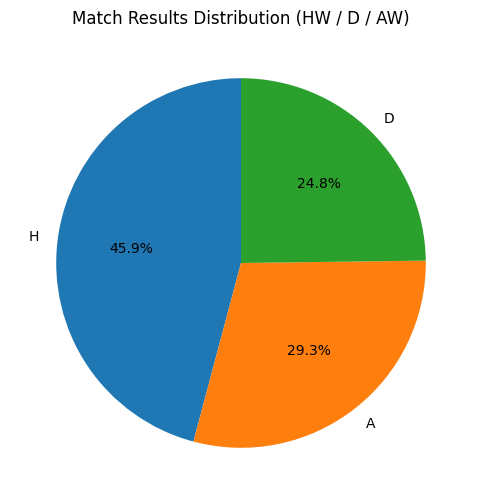

/tmp/ipython-input-717769701.py:12: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_prem.set_index("Date").resample("Y")["total_goals"].mean().plot(title="Average Total Goals Per Match Over Time")


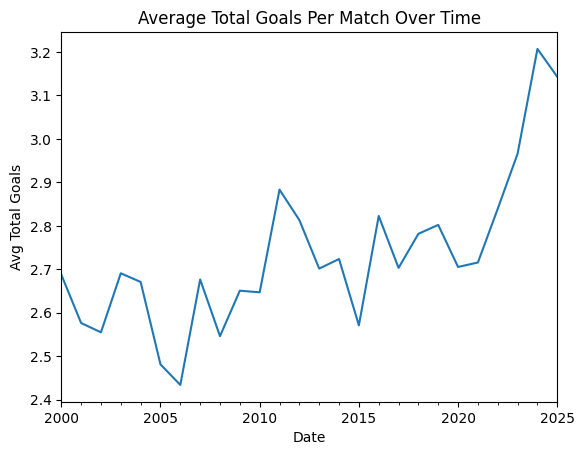

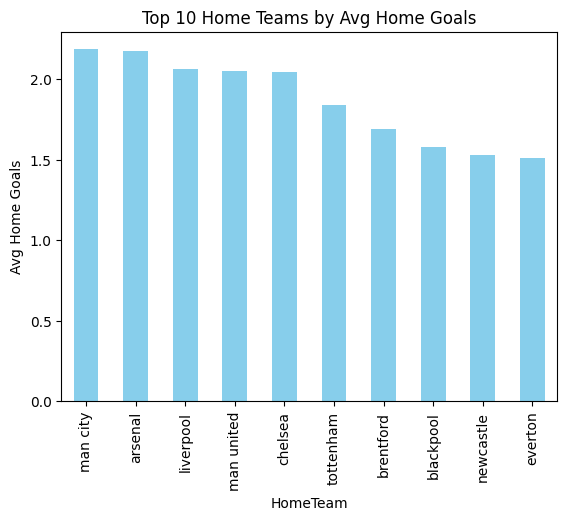

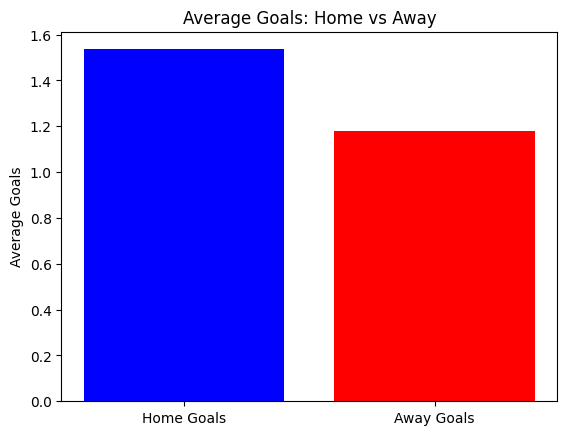

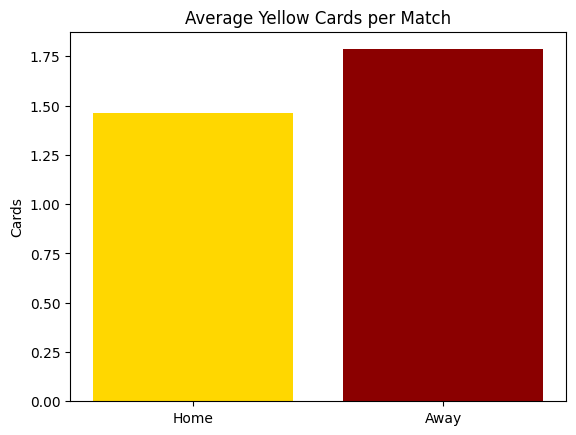

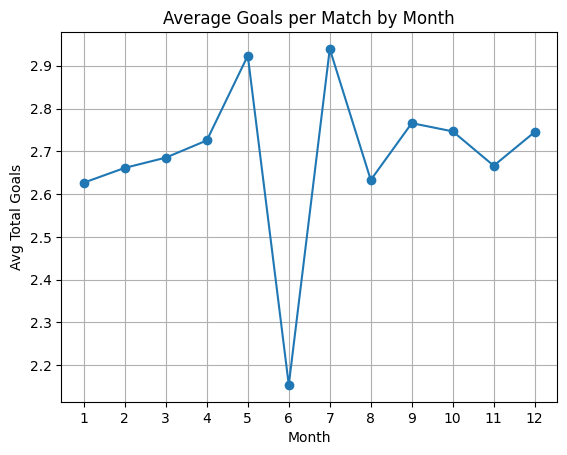

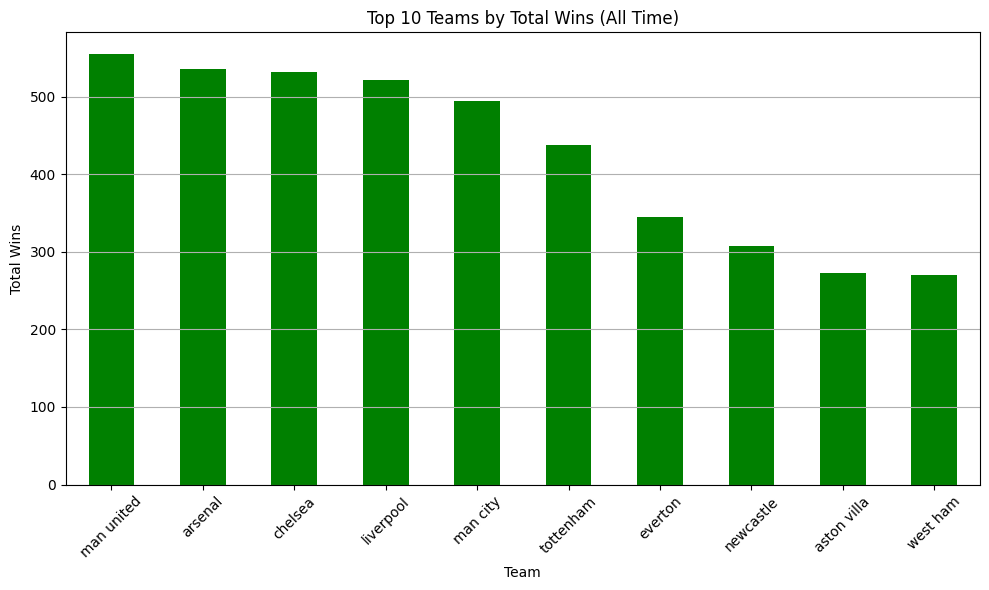

In [5]:
# 📊 DESCRIPTIVE ANALYSIS (EDA)
# -----------------------------------

# Match outcome distribution
plt.figure(figsize=(6, 6))
df_prem["FT Result"].value_counts().plot(kind="pie", autopct="%1.1f%%", startangle=90)
plt.title("Match Results Distribution (HW / D / AW)")
plt.ylabel("")
plt.show()

# Average goals per match per year
df_prem.set_index("Date").resample("Y")["total_goals"].mean().plot(title="Average Total Goals Per Match Over Time")
plt.ylabel("Avg Total Goals")
plt.show()

# Top 10 home teams by avg goals
top_teams = df_prem.groupby("HomeTeam")["FTH Goals"].mean().sort_values(ascending=False).head(10)
top_teams.plot(kind="bar", title="Top 10 Home Teams by Avg Home Goals", color="skyblue")
plt.ylabel("Avg Home Goals")
plt.show()


# 🟦 Home vs 🟥 Away Average Goals
avg_home_goals = df_prem["FTH Goals"].mean()
avg_away_goals = df_prem["FTA Goals"].mean()

plt.bar(["Home Goals", "Away Goals"], [avg_home_goals, avg_away_goals], color=["blue", "red"])
plt.title("Average Goals: Home vs Away")
plt.ylabel("Average Goals")
plt.show()

#  🟨 Yellow Cards: Home vs Away
avg_yellow_home = df_prem["H Yellow"].mean()
avg_yellow_away = df_prem["A Yellow"].mean()

plt.bar(["Home", "Away"], [avg_yellow_home, avg_yellow_away], color=["gold", "darkred"])
plt.title("Average Yellow Cards per Match")
plt.ylabel("Cards")
plt.show()


#  🕒 Goal Trends by Month (Seasonal Insights)
df_prem["Month"] = df_prem["Date"].dt.month
monthly_goals = df_prem.groupby("Month")["total_goals"].mean()

plt.plot(monthly_goals.index, monthly_goals.values, marker='o')
plt.title("Average Goals per Match by Month")
plt.xlabel("Month")
plt.ylabel("Avg Total Goals")
plt.grid(True)
plt.xticks(range(1, 13))
plt.show()



# 🏆 Top 10 Teams by Total Wins (Home + Away)
# Count home wins
home_wins = df_prem[df_prem["FT Result"] == "H"]["HomeTeam"].value_counts()

# Count away wins
away_wins = df_prem[df_prem["FT Result"] == "A"]["AwayTeam"].value_counts()

# Combine home and away wins
total_wins = home_wins.add(away_wins, fill_value=0)

# Get Top 10
top_10_wins = total_wins.sort_values(ascending=False).head(10)



plt.figure(figsize=(10, 6))
top_10_wins.plot(kind="bar", color="green")
plt.title("Top 10 Teams by Total Wins (All Time)")
plt.ylabel("Total Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

In [23]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Step 1: Prepare data for home xG model
home_features = ["H Shots", "H SOT", "H Corners", "H Fouls", "H Yellow", "H Red"]
X_home = df_prem[home_features]
y_home = df_prem["FTH Goals"]

# Train-test split
Xh_train, Xh_test, yh_train, yh_test = train_test_split(X_home, y_home, test_size=0.2, random_state=42)

# Train home xG model
home_model = RandomForestRegressor(n_estimators=100, random_state=42)
home_model.fit(Xh_train, yh_train)

# Predict home expected goals
df_prem["home_xG"] = home_model.predict(X_home)

# Step 2: Prepare data for away xG model
away_features = ["A Shots", "A SOT", "A Corners", "A Fouls", "A Yellow", "A Red"]
X_away = df_prem[away_features]
y_away = df_prem["FTA Goals"]

# Train-test split
Xa_train, Xa_test, ya_train, ya_test = train_test_split(X_away, y_away, test_size=0.2, random_state=42)

# Train away xG model
away_model = RandomForestRegressor(n_estimators=100, random_state=42)
away_model.fit(Xa_train, ya_train)

# Predict away expected goals
df_prem["away_xG"] = away_model.predict(X_away)


In [24]:
# Home xG by team
home_xg_avg = df_prem.groupby("HomeTeam")["home_xG"].mean().rename("avg_home_xG")

# Away xG by team
away_xg_avg = df_prem.groupby("AwayTeam")["away_xG"].mean().rename("avg_away_xG")

# Merge both
team_xg = pd.concat([home_xg_avg, away_xg_avg], axis=1).fillna(0).reset_index()
team_xg.columns = ["Team", "Avg Home xG", "Avg Away xG"]

# Sort by average home xG
team_xg = team_xg.sort_values(by="Avg Home xG", ascending=False)

# Display
print(team_xg.head(10))

team_xg.to_excel("team_avg_xg.xlsx", index=False)




                      Team  Avg Home xG  Avg Away xG
10  brighton & hove albion     2.600000     1.320000
0                  arsenal     2.012861     1.517345
28                man city     1.996791     1.514663
29              man united     1.986601     1.518015
14                 chelsea     1.974583     1.532357
26               liverpool     1.956093     1.546494
42               tottenham     1.833373     1.392497
4                blackpool     1.782434     1.393870
34              portsmouth     1.610000     1.018062
8                brentford     1.602211     1.180932


Comeback Prediction in home and away matches by teams


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import pandas as pd

# 🧪 Feature engineering
df_prem["half_goal_diff"] = df_prem["HTH Goals"] - df_prem["HTA Goals"]

# 🎯 1. Home Comeback Prediction with SMOTE
features_home = [
    "H Shots", "H SOT", "H Corners", "H Fouls",
    "A Shots", "A SOT", "A Corners", "A Fouls",
    "half_goal_diff"
]
X_home = df_prem[features_home]
y_home = df_prem["home_comeback"]

# Train-test split
Xh_train, Xh_test, yh_train, yh_test = train_test_split(X_home, y_home, test_size=0.2, random_state=42)

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
Xh_train_res, yh_train_res = smote.fit_resample(Xh_train, yh_train)

# Train model
log_home = LogisticRegression(max_iter=1000, random_state=42)
log_home.fit(Xh_train_res, yh_train_res)
yh_pred = log_home.predict(Xh_test)

print("🏟️ Home Comeback Prediction (Logistic Regression + SMOTE)")
print(classification_report(yh_test, yh_pred))
print("Confusion Matrix:\n", confusion_matrix(yh_test, yh_pred))


# 🚗 2. Away Comeback Prediction with SMOTE
features_away = [
    "A Shots", "A SOT", "A Corners", "A Fouls",
    "H Shots", "H SOT", "H Corners", "H Fouls",
    "half_goal_diff"
]
X_away = df_prem[features_away]
y_away = df_prem["away_comeback"]

Xa_train, Xa_test, ya_train, ya_test = train_test_split(X_away, y_away, test_size=0.2, random_state=42)

# Apply SMOTE
Xa_train_res, ya_train_res = smote.fit_resample(Xa_train, ya_train)

# Train model
log_away = LogisticRegression(max_iter=1000, random_state=42)
log_away.fit(Xa_train_res, ya_train_res)
ya_pred = log_away.predict(Xa_test)

print("\n🚗 Away Comeback Prediction (Logistic Regression + SMOTE)")
print(classification_report(ya_test, ya_pred))
print("Confusion Matrix:\n", confusion_matrix(ya_test, ya_pred))



# 📊 3. Team-wise Comeback Rates (All Teams)

# Home team comeback rates
home_stats = (
    df_prem.groupby("HomeTeam")["home_comeback"]
    .agg(["sum", "count"])
    .rename(columns={"sum": "home_comebacks", "count": "home_matches"})
)
home_stats["home_cb_rate"] = 100 * home_stats["home_comebacks"] / home_stats["home_matches"]

# Away team comeback rates
away_stats = (
    df_prem.groupby("AwayTeam")["away_comeback"]
    .agg(["sum", "count"])
    .rename(columns={"sum": "away_comebacks", "count": "away_matches"})
)
away_stats["away_cb_rate"] = 100 * away_stats["away_comebacks"] / away_stats["away_matches"]

# Merge both stats
team_cb_rates = pd.concat([home_stats, away_stats], axis=1).fillna(0)
team_cb_rates = team_cb_rates[["home_cb_rate", "away_cb_rate"]].round(2)

print("\n📊 Comeback Rates by Team (All Teams):")
print(team_cb_rates)


# ✅ 4. Exporting to Excel
with pd.ExcelWriter("comeback_analysis_output.xlsx") as writer:
    team_cb_rates.to_excel(writer, sheet_name="Team Comeback Rates")
    df_prem[[
        "Date", "HomeTeam", "AwayTeam",
        "home_comeback", "home_cb_pred",
        "away_comeback", "away_cb_pred"
    ]].to_excel(writer, sheet_name="Match Predictions", index=False)


🏟️ Home Comeback Prediction (Logistic Regression + SMOTE)
              precision    recall  f1-score   support

           0       1.00      0.80      0.89      1819
           1       0.11      0.94      0.20        47

    accuracy                           0.81      1866
   macro avg       0.55      0.87      0.54      1866
weighted avg       0.98      0.81      0.87      1866

Confusion Matrix:
 [[1461  358]
 [   3   44]]

🚗 Away Comeback Prediction (Logistic Regression + SMOTE)
              precision    recall  f1-score   support

           0       1.00      0.78      0.87      1832
           1       0.07      0.85      0.12        34

    accuracy                           0.78      1866
   macro avg       0.53      0.82      0.50      1866
weighted avg       0.98      0.78      0.86      1866

Confusion Matrix:
 [[1426  406]
 [   5   29]]

📊 Comeback Rates by Team (All Teams):
                        home_cb_rate  away_cb_rate
arsenal                         4.29          2.

KeyError: "['home_cb_pred', 'away_cb_pred'] not in index"